**Homework 4 Spring 202**

**Due Date** - **11/23/2022**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pprint 
pp = pprint.PrettyPrinter(indent=4)
import warnings
warnings.filterwarnings("ignore")

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

import pandas as pd


# PART 2 CIFAR 10 Dataset

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). The train/test split is 50k/10k.

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [ ]:
LABELS = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

2.1 Plot 5 samples from each class/label from train set on a 10*5 subplot

In [ ]:
a=np.where(y_dev ==0)[0][0:5]
a

array([29, 30, 35, 49, 77])

In [ ]:
#Your code here

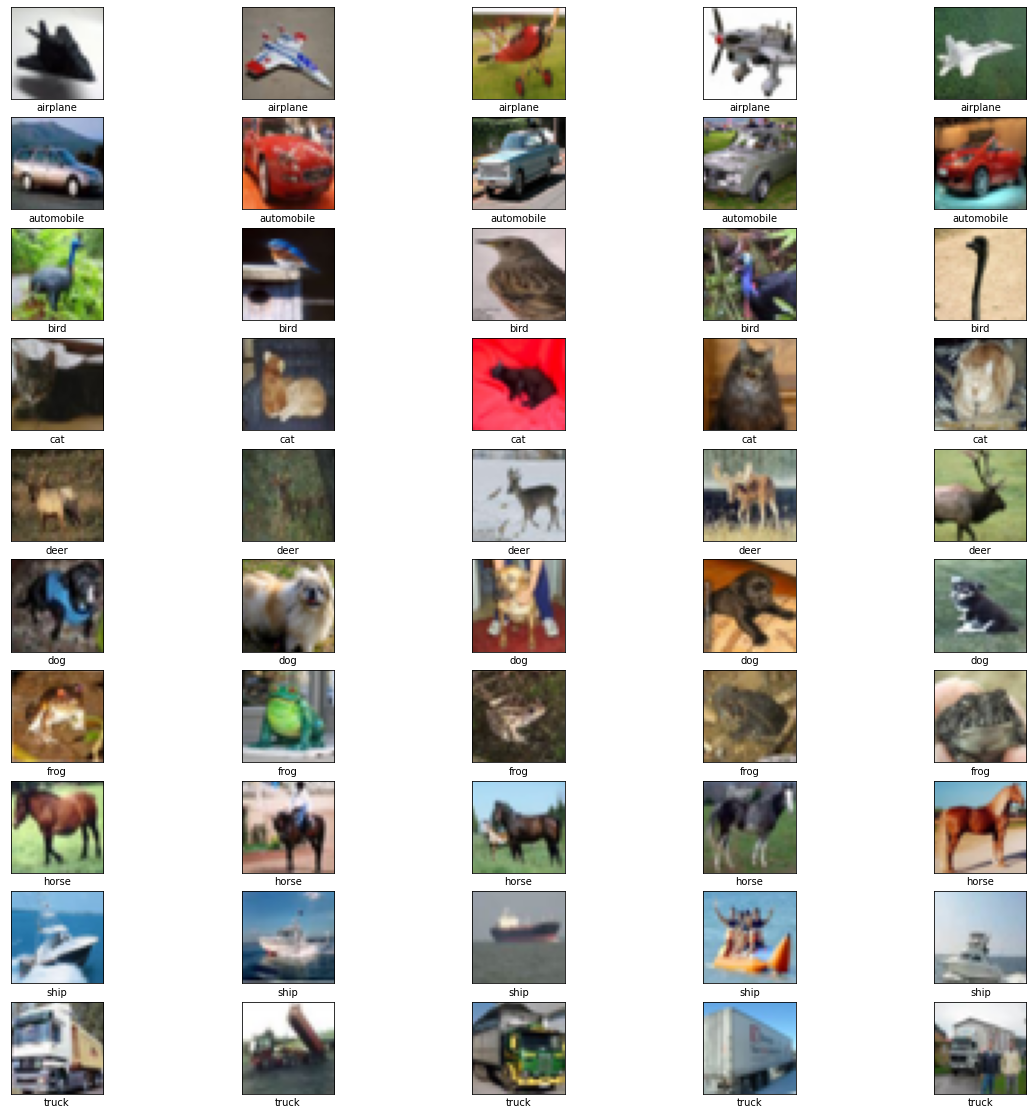

In [ ]:
plt.figure(figsize=(20,20))
for j in range(len(LABELS)):
  lab_index=np.where(y_dev ==j)[0][0:5]
  for k in range(5):
    plt.subplot(10,5, j*5+k+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_dev[lab_index[k]], cmap=plt.cm.binary)
    plt.xlabel(LABELS[j])

2.2  Preparing the dataset for CNN 

1) Print the shapes - $x_{dev}, y_{dev},x_{test},y_{test}$

2) Flatten the images into one-dimensional vectors and again print the shapes of $x_{dev}$,$x_{test}$

3) Standardize the development and test sets.

4) Train-test split your development set into train and validation sets (8:2 ratio).

In [ ]:
#Your code here
# 1
print('shape of x_dev is', x_dev.shape)
print('shape of y_dev is', y_dev.shape)
print('shape of x_test is', x_test.shape)
print('shape of y_test is', y_test.shape)

# 2
print('After Reshape')
x_dev=x_dev.reshape(y_dev.shape[0], -1)
print('shape of x_dev is', x_dev.shape)
x_test=x_test.reshape(y_test.shape[0], -1)
print('shape of x_test is', x_test.shape)

# 3
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_dev = scaler.fit_transform(x_dev) # Fit and transform scalar on X_train
x_test = scaler.transform(x_test)

# 4
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_dev, y_dev, test_size=0.2, stratify=y_dev, random_state=0)

shape of x_dev is (50000, 32, 32, 3)
shape of y_dev is (50000, 1)
shape of x_test is (10000, 32, 32, 3)
shape of y_test is (10000, 1)
After Reshape
shape of x_dev is (50000, 3072)
shape of x_test is (10000, 3072)


2.3 Build the feed forward network 

First hidden layer size - 128

Second hidden layer size - 64

Third and last layer size - You should know this


In [ ]:
#Your code here
model=Sequential([
    Dense(128, input_shape=(x_train.shape[1], )),
    Activation('relu'),
    Dense(64),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])


2.4) Print out the model summary. Can show show the calculation for each layer for estimating the number of parameters

In [ ]:
#Your code here
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               393344    
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 402,250
Trainable params: 402,250
Non-trai

dense(Dense): $393344 = (1+x.shape[1])*128 = (1+3072)*128$

dense_1 (Dense): $8256 = (1+128)*128$

dense_2 (Dense): $650 = (1+64)*10$

2.5) Do you think this number is dependent on the image height and width? 

In [ ]:
# Your text here

It is dependent on the image height and width. Because each layer is dependent on the size of the previous layer. The first layer is dependent on the input size, which is dependent on image height and width. In this case, input size 3072=image height * image width * 3.

**Printing out your model's output on first train sample. This will confirm if your dimensions are correctly set up. The sum of this output equal to 1 upto two decimal places?**

In [ ]:
#modify name of X_train based on your requirement

model.compile()
output = model.predict(x_train[0].reshape(1,-1))

# print(output)
print("Output: {:.2f}".format(sum(output[0])))

1/1 [==============================] - 2s 2s/step
Output: 1.00


2.6) Using the right metric and  the right loss function, with Adam as the optimizer, train your model for 20 epochs with batch size 128.

In [ ]:
#Your code here
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
313/313 [==============================] - 1s 3ms/step - loss: 1.8047 - accuracy: 0.3741
Epoch 2/20
313/313 [==============================] - 1s 4ms/step - loss: 1.5533 - accuracy: 0.4556
Epoch 3/20
313/313 [==============================] - 1s 3ms/step - loss: 1.4369 - accuracy: 0.4990
Epoch 4/20
313/313 [==============================] - 1s 3ms/step - loss: 1.3562 - accuracy: 0.5242
Epoch 5/20
313/313 [==============================] - 1s 3ms/step - loss: 1.2943 - accuracy: 0.5450
Epoch 6/20
313/313 [==============================] - 1s 3ms/step - loss: 1.2375 - accuracy: 0.5653
Epoch 7/20
313/313 [==============================] - 1s 3ms/step - loss: 1.1921 - accuracy: 0.5803
Epoch 8/20
313/313 [==============================] - 1s 3ms/step - loss: 1.1475 - accuracy: 0.5942
Epoch 9/20
313/313 [==============================] - 1s 3ms/step - loss: 1.1061 - accuracy: 0.6139
Epoch 10/20
313/313 [==============================] - 1s 3ms/step - loss: 1.0621 - accuracy: 0.6254

2.7) Plot a separate plots for:

a. displaying train vs validation loss over each epoch

b. displaying train vs validation accuracy over each epoch 

In [ ]:
#Your code here
history_callback=model.fit(x_dev, y_dev, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
313/313 [==============================] - 2s 5ms/step - loss: 0.9746 - accuracy: 0.6763 - val_loss: 0.9667 - val_accuracy: 0.6791
Epoch 2/20
313/313 [==============================] - 1s 4ms/step - loss: 0.8783 - accuracy: 0.7018 - val_loss: 0.9897 - val_accuracy: 0.6674
Epoch 3/20
313/313 [==============================] - 1s 4ms/step - loss: 0.8390 - accuracy: 0.7113 - val_loss: 1.0449 - val_accuracy: 0.6520
Epoch 4/20
313/313 [==============================] - 1s 4ms/step - loss: 0.8039 - accuracy: 0.7242 - val_loss: 1.0711 - val_accuracy: 0.6410
Epoch 5/20
313/313 [==============================] - 1s 4ms/step - loss: 0.7826 - accuracy: 0.7293 - val_loss: 1.0935 - val_accuracy: 0.6362
Epoch 6/20
313/313 [==============================] - 1s 4ms/step - loss: 0.7569 - accuracy: 0.7351 - val_loss: 1.1027 - val_accuracy: 0.6350
Epoch 7/20
313/313 [==============================] - 1s 4ms/step - loss: 0.7293 - accuracy: 0.7491 - val_loss: 1.1752 - val_accuracy: 0.6173
Epoch 

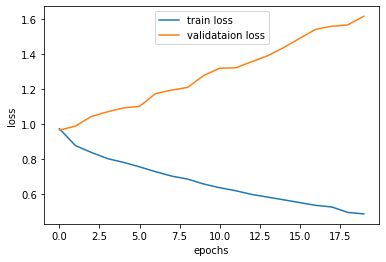

In [ ]:
hist=pd.DataFrame(history_callback.history)
fig, ax=plt.subplots()
ax.plot(hist.index, hist['loss'], label='train loss')
ax.plot(hist.index, hist['val_loss'], label='validataion loss')
plt.legend(loc='upper center')
ax.set_ylabel('loss')
ax.set_xlabel('epochs');

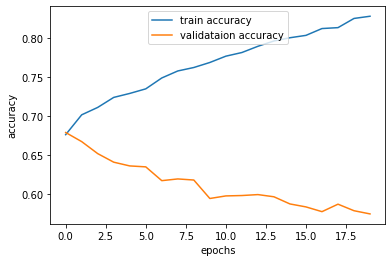

In [ ]:
fig, ax=plt.subplots()
ax.plot(hist.index, hist['accuracy'], label='train accuracy')
ax.plot(hist.index, hist['val_accuracy'], label='validataion accuracy')
plt.legend(loc='upper center')
ax.set_ylabel('accuracy')
ax.set_xlabel('epochs');

2.8) Finally, report the metric chosen on test set.

In [ ]:
#Your code here
score=model.evaluate(x_test, y_test, verbose=0)
print('test loss: {:.3f}'.format(score[0]))
print('test accuracy: {:.3f}'.format(score[1]))

test loss: 2.361
test accuracy: 0.486


2.9 If the accuracy achieved is quite less(<50%), try improve the accuracy [Open ended question, you may try different approaches]

In [ ]:
#Your code here
model2=Sequential([
    Dense(128, input_shape=(x_train.shape[1], )),
    Activation('relu'),
    Dense(64),
    Activation('sigmoid'),
    Dense(32),
    Activation('sigmoid'),
    Dense(10),
    Activation('softmax'),
])

In [ ]:
model2.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model2.fit(x_dev, y_dev, batch_size=128, epochs=20, verbose=1, validation_split=0.2)
score2=model2.evaluate(x_test, y_test, verbose=0)
print('test loss: {:.3f}'.format(score2[0]))
print('test accuracy: {:.3f}'.format(score2[1]))

Epoch 1/20
313/313 [==============================] - 2s 5ms/step - loss: 1.8647 - accuracy: 0.3697 - val_loss: 1.7007 - val_accuracy: 0.4166
Epoch 2/20
313/313 [==============================] - 1s 4ms/step - loss: 1.5943 - accuracy: 0.4486 - val_loss: 1.5743 - val_accuracy: 0.4437
Epoch 3/20
313/313 [==============================] - 1s 5ms/step - loss: 1.4842 - accuracy: 0.4816 - val_loss: 1.5305 - val_accuracy: 0.4642
Epoch 4/20
313/313 [==============================] - 1s 4ms/step - loss: 1.4129 - accuracy: 0.5032 - val_loss: 1.4878 - val_accuracy: 0.4741
Epoch 5/20
313/313 [==============================] - 1s 4ms/step - loss: 1.3582 - accuracy: 0.5215 - val_loss: 1.4786 - val_accuracy: 0.4730
Epoch 6/20
313/313 [==============================] - 1s 4ms/step - loss: 1.3123 - accuracy: 0.5395 - val_loss: 1.4618 - val_accuracy: 0.4840
Epoch 7/20
313/313 [==============================] - 1s 4ms/step - loss: 1.2756 - accuracy: 0.5521 - val_loss: 1.4477 - val_accuracy: 0.4908
Epoch 

2.10 Plot the first 50 samples of test dataset on a 10*5 subplot and this time label the images with both the ground truth (GT) and predicted class (P). (Make sure you predict the class with the improved model)

In [ ]:
(x_dev_d, y_dev_d), (x_test_d, y_test_d) = cifar10.load_data()

In [ ]:
y_class=np.argmax(model2(x_test, training=False), axis=-1)

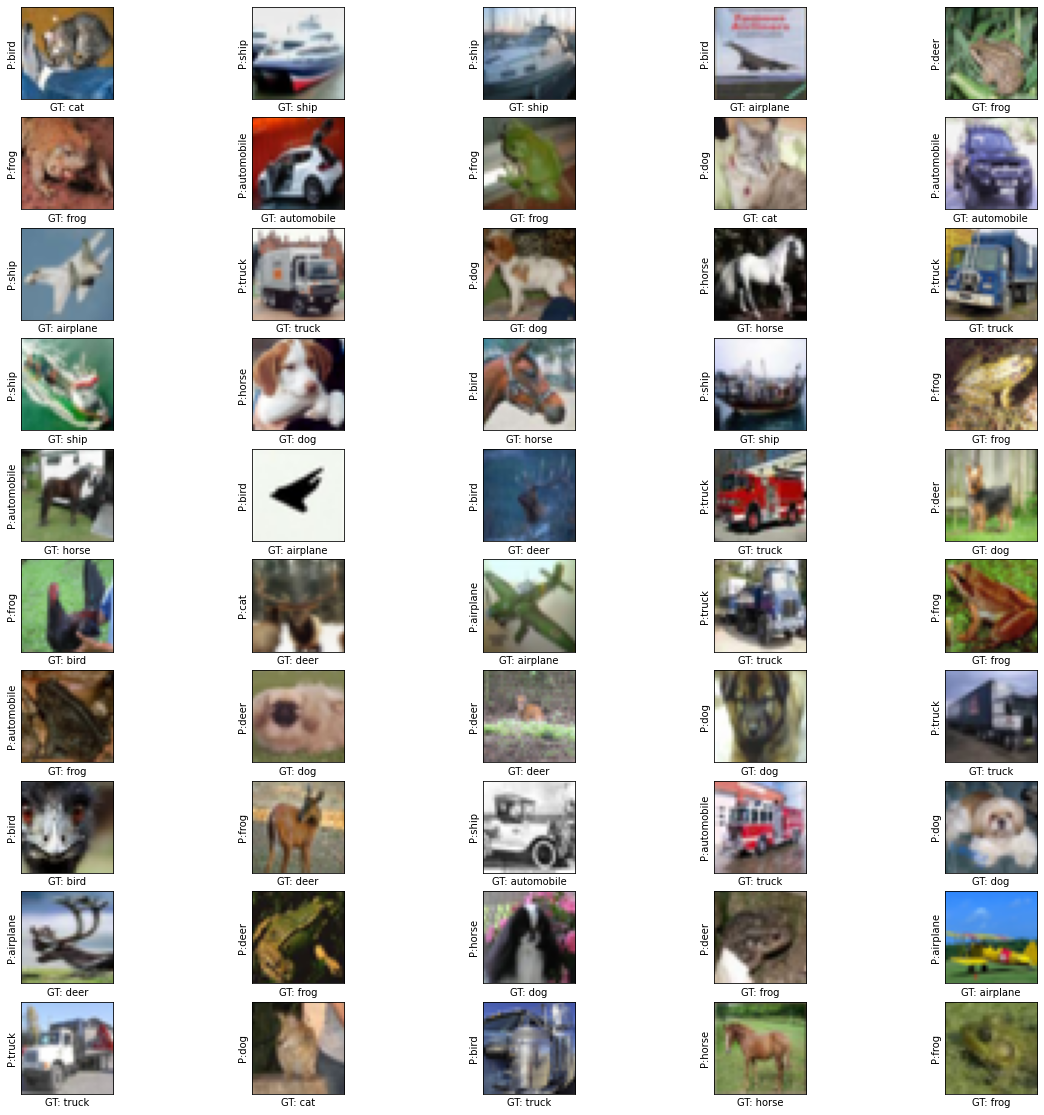

In [ ]:
#Your code here
plt.figure(figsize=(20,20))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test_d[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel('GT: '+ LABELS[y_test[i][0]])
    plt.ylabel('P:'+ LABELS[y_class[i]])
plt.show()


# PART 3 Convolutional Neural Network

In this part of the homework, we will build and train a classical convolutional neural network on the CIFAR Dataset

In [3]:
from tensorflow.keras.datasets import cifar10
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()
print("x_dev: {},y_dev: {},x_test: {},y_test: {}".format(x_dev.shape, y_dev.shape, x_test.shape, y_test.shape))

x_dev, x_test = x_dev.astype('float32'), x_test.astype('float32')
x_dev = x_dev/255.0
x_test = x_test/255.0


from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_dev, y_dev,test_size = 0.2, random_state = 42)


170498071/170498071 [==============================] - 14s 0us/step
x_dev: (50000, 32, 32, 3),y_dev: (50000, 1),x_test: (10000, 32, 32, 3),y_test: (10000, 1)


3.1 We will be implementing the one of the first CNN models put forward by Yann LeCunn, which is commonly refered to as LeNet-5. The network has the following layers:

1) 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1 padded to yield the same size as input, ReLU activation

2) Maxpooling layer of 2x2

3) 2D convolutional layer with 16 filters, 5x5 kernel, 0 padding, ReLU activation

4 )Maxpooling layer of 2x2

5) 2D convolutional layer with 120 filters, 5x5 kernel, ReLU activation. Note that this layer has 120 output channels (filters), and each channel has only 1 number. The output of this layer is just a vector with 120 units!

6) A fully connected layer with 84 units, ReLU activation

7) The output layer where each unit respresents the probability of image being in that category. What activation function should you use in this layer? (You should know this)


In [5]:
input_shape=(32, 32, 3)

In [ ]:
# your code here
cnn=Sequential()
cnn.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape, padding='same'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(16, kernel_size=(5, 5), activation='relu', padding='valid'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(120, kernel_size=(5, 5), activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(84, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

3.2 Report the model summary 

In [ ]:
#your code here
cnn.build()
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 480)               0

3.3 Model Training

1) Train the model for 20 epochs. In each epoch, record the loss and metric (chosen in part 3) scores for both train and validation sets.

2) Plot a separate plots for:

* displaying train vs validation loss over each epoch
* displaying train vs validation accuracy over each epoch

3) Report the model performance on the test set. Feel free to tune the hyperparameters such as batch size and optimizers to achieve better performance.

In [ ]:
# Your code here
cnn.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history_callback_cnn=cnn.fit(x_dev, y_dev, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
313/313 [==============================] - 10s 8ms/step - loss: 1.7821 - accuracy: 0.3304 - val_loss: 1.5827 - val_accuracy: 0.4161
Epoch 2/20
313/313 [==============================] - 2s 6ms/step - loss: 1.5123 - accuracy: 0.4489 - val_loss: 1.4446 - val_accuracy: 0.4738
Epoch 3/20
313/313 [==============================] - 2s 8ms/step - loss: 1.3783 - accuracy: 0.5033 - val_loss: 1.3558 - val_accuracy: 0.5120
Epoch 4/20
313/313 [==============================] - 2s 6ms/step - loss: 1.2893 - accuracy: 0.5393 - val_loss: 1.3798 - val_accuracy: 0.5039
Epoch 5/20
313/313 [==============================] - 2s 6ms/step - loss: 1.2303 - accuracy: 0.5629 - val_loss: 1.2275 - val_accuracy: 0.5638
Epoch 6/20
313/313 [==============================] - 2s 6ms/step - loss: 1.1629 - accuracy: 0.5881 - val_loss: 1.2275 - val_accuracy: 0.5577
Epoch 7/20
313/313 [==============================] - 2s 6ms/step - loss: 1.1274 - accuracy: 0.6003 - val_loss: 1.1842 - val_accuracy: 0.5846
Epoch

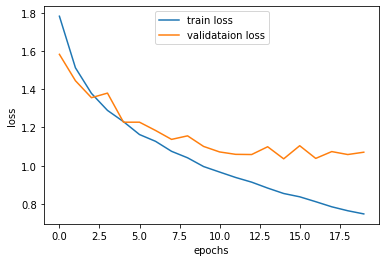

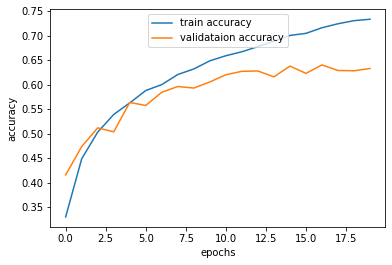

In [ ]:
# 2
hist_cnn=pd.DataFrame(history_callback_cnn.history)
fig, ax=plt.subplots()
ax.plot(hist_cnn.index, hist_cnn['loss'], label='train loss')
ax.plot(hist_cnn.index, hist_cnn['val_loss'], label='validataion loss')
plt.legend(loc='upper center')
ax.set_ylabel('loss')
ax.set_xlabel('epochs');

fig, ax=plt.subplots()
ax.plot(hist_cnn.index, hist_cnn['accuracy'], label='train accuracy')
ax.plot(hist_cnn.index, hist_cnn['val_accuracy'], label='validataion accuracy')
plt.legend(loc='upper center')
ax.set_ylabel('accuracy')
ax.set_xlabel('epochs');

In [ ]:
# 3
score_cnn=cnn.evaluate(x_test, y_test, verbose=0)
print('test loss: {:.3f}'.format(score_cnn[0]))
print('test accuracy: {:.3f}'.format(score_cnn[1]))

test loss: 1.084
test accuracy: 0.637


3.4 Overfitting

1) To overcome overfitting, we will train the network again with dropout this time. For hidden layers use dropout probability of 0.3. Train the model again for 20 epochs. Report model performance on test set. 

Plot a separate plots for:

*   displaying train vs validation loss over each epoch
*   displaying train vs validation accuracy over each epoch 

2) This time, let's apply a batch normalization after every hidden layer, train the model for 20 epochs, report model performance on test set as above. 

Plot a separate plots for:

*   displaying train vs validation loss over each epoch
*   displaying train vs validation accuracy over each epoch 

3) Compare batch normalization technique with the original model and with dropout, which technique do you think helps with overfitting better?

In [6]:
# Your code here
# 1
cnn_dropout=Sequential()
cnn_dropout.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape, padding='same'))
cnn_dropout.add(MaxPooling2D(pool_size=(2, 2)))
cnn_dropout.add(Dropout(0.3))
cnn_dropout.add(Conv2D(16, kernel_size=(5, 5), activation='relu', padding='valid'))
cnn_dropout.add(MaxPooling2D(pool_size=(2, 2)))
cnn_dropout.add(Dropout(0.3))
cnn_dropout.add(Conv2D(120, kernel_size=(5, 5), activation='relu'))
cnn_dropout.add(Flatten())
cnn_dropout.add(Dropout(0.3))
cnn_dropout.add(Dense(84, activation='relu'))
cnn_dropout.add(Dropout(0.3))
cnn_dropout.add(Dense(10, activation='softmax'))

cnn_dropout.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history_callback_dropout=cnn_dropout.fit(x_dev, y_dev, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
313/313 [==============================] - 10s 7ms/step - loss: 1.9165 - accuracy: 0.2758 - val_loss: 1.6187 - val_accuracy: 0.4009
Epoch 2/20
313/313 [==============================] - 2s 5ms/step - loss: 1.6420 - accuracy: 0.3921 - val_loss: 1.5123 - val_accuracy: 0.4592
Epoch 3/20
313/313 [==============================] - 2s 5ms/step - loss: 1.5463 - accuracy: 0.4326 - val_loss: 1.4146 - val_accuracy: 0.4850
Epoch 4/20
313/313 [==============================] - 2s 6ms/step - loss: 1.4759 - accuracy: 0.4629 - val_loss: 1.3488 - val_accuracy: 0.5153
Epoch 5/20
313/313 [==============================] - 2s 6ms/step - loss: 1.4225 - accuracy: 0.4852 - val_loss: 1.2812 - val_accuracy: 0.5418
Epoch 6/20
313/313 [==============================] - 2s 6ms/step - loss: 1.3809 - accuracy: 0.4992 - val_loss: 1.2565 - val_accuracy: 0.5447
Epoch 7/20
313/313 [==============================] - 2s 6ms/step - loss: 1.3396 - accuracy: 0.5171 - val_loss: 1.1820 - val_accuracy: 0.5760
Epoch

In [7]:
score_dropout=cnn_dropout.evaluate(x_test, y_test, verbose=0)
print('test loss with dropout: {:.3f}'.format(score_dropout[0]))
print('test accuracy with dropout: {:.3f}'.format(score_dropout[1]))

test loss with dropout: 1.080
test accuracy with dropout: 0.622


cnn with dropout


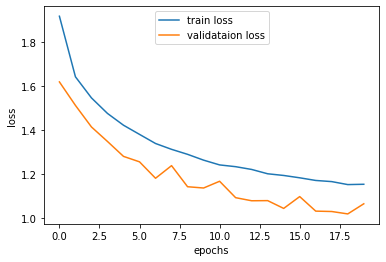

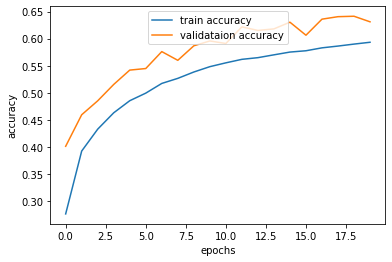

In [9]:
print('cnn with dropout')
hist_dropout=pd.DataFrame(history_callback_dropout.history)
fig, ax=plt.subplots()
ax.plot(hist_dropout.index, hist_dropout['loss'], label='train loss')
ax.plot(hist_dropout.index, hist_dropout['val_loss'], label='validataion loss')
plt.legend(loc='upper center')
ax.set_ylabel('loss')
ax.set_xlabel('epochs');

fig, ax=plt.subplots()
ax.plot(hist_dropout.index, hist_dropout['accuracy'], label='train accuracy')
ax.plot(hist_dropout.index, hist_dropout['val_accuracy'], label='validataion accuracy')
plt.legend(loc='upper center')
ax.set_ylabel('accuracy')
ax.set_xlabel('epochs');

In [10]:
# 2
cnn_bn=Sequential()
cnn_bn.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape, padding='same'))
cnn_bn.add(MaxPooling2D(pool_size=(2, 2)))
cnn_bn.add(BatchNormalization())
cnn_bn.add(Conv2D(16, kernel_size=(5, 5), activation='relu', padding='valid'))
cnn_bn.add(MaxPooling2D(pool_size=(2, 2)))
cnn_bn.add(BatchNormalization())
cnn_bn.add(Conv2D(120, kernel_size=(5, 5), activation='relu'))
cnn_bn.add(Flatten())
cnn_bn.add(BatchNormalization())
cnn_bn.add(Dense(84, activation='relu'))
cnn_bn.add(BatchNormalization())
cnn_bn.add(Dense(10, activation='softmax'))

cnn_bn.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history_callback_bn=cnn_bn.fit(x_dev, y_dev, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
313/313 [==============================] - 3s 8ms/step - loss: 1.5160 - accuracy: 0.4602 - val_loss: 1.7775 - val_accuracy: 0.4076
Epoch 2/20
313/313 [==============================] - 2s 7ms/step - loss: 1.1688 - accuracy: 0.5838 - val_loss: 1.2466 - val_accuracy: 0.5588
Epoch 3/20
313/313 [==============================] - 2s 7ms/step - loss: 1.0262 - accuracy: 0.6385 - val_loss: 1.2728 - val_accuracy: 0.5647
Epoch 4/20
313/313 [==============================] - 2s 7ms/step - loss: 0.9216 - accuracy: 0.6710 - val_loss: 1.0820 - val_accuracy: 0.6281
Epoch 5/20
313/313 [==============================] - 2s 7ms/step - loss: 0.8413 - accuracy: 0.7027 - val_loss: 1.0742 - val_accuracy: 0.6340
Epoch 6/20
313/313 [==============================] - 2s 7ms/step - loss: 0.7697 - accuracy: 0.7299 - val_loss: 1.3598 - val_accuracy: 0.5756
Epoch 7/20
313/313 [==============================] - 2s 7ms/step - loss: 0.6967 - accuracy: 0.7561 - val_loss: 1.1803 - val_accuracy: 0.6134
Epoch 

test loss with batch normalization: 1.766
test accuracy with batch normalization: 0.607
cnn with batch normalization


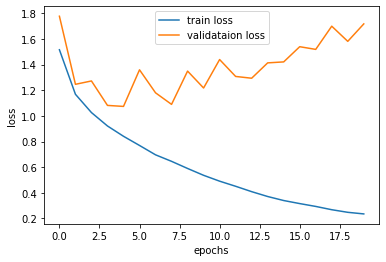

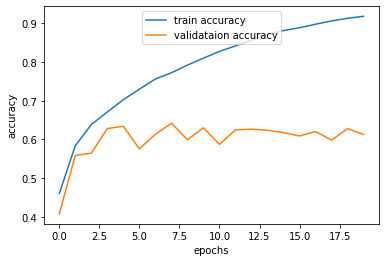

In [11]:
score_bn=cnn_bn.evaluate(x_test, y_test, verbose=0)
print('test loss with batch normalization: {:.3f}'.format(score_bn[0]))
print('test accuracy with batch normalization: {:.3f}'.format(score_bn[1]))

print('cnn with batch normalization')
hist_bn=pd.DataFrame(history_callback_bn.history)
fig, ax=plt.subplots()
ax.plot(hist_bn.index, hist_bn['loss'], label='train loss')
ax.plot(hist_bn.index, hist_bn['val_loss'], label='validataion loss')
plt.legend(loc='upper center')
ax.set_ylabel('loss')
ax.set_xlabel('epochs');

fig, ax=plt.subplots()
ax.plot(hist_bn.index, hist_bn['accuracy'], label='train accuracy')
ax.plot(hist_bn.index, hist_bn['val_accuracy'], label='validataion accuracy')
plt.legend(loc='upper center')
ax.set_ylabel('accuracy')
ax.set_xlabel('epochs');

The original cnn has test loss 1.084 and test accuracy 0.637. The cnn with dropout has test loss 1.080 and test accuracy 0.622. The cnn with batch normalization has test loss 1.766 and test accuracy 0.607. The cnn with dropout has the lower test loss and the higher test accuracy. 

Moreover, for both the original cnn and cnn with batch normalization, the performaces on the validation data do not keep improving after some epochs. For cnn with batch normalization, the performaces on the validation data fluctuates a lot. For cnn with dropout, the performaces on the validation data keep improving with more epochs and is relatively stable. Cnn with dropout performs best on validation data.

So, I will use cnn with dropout to solve overfitting.